- Cho tập dữ liệu sau:
    + x = [1, 3, 3, 5, 5, 6, 8, 9, 10, 12]
    + y = [2, 2, 4, 2, 4, 6, 6, 8, 5, 7]

- Lấy ngẫu nhiên 8 điểm (x, y) làm tập huấn luyện, tìm tham số (a, b) của mô hình tuyến tính ax+b, đánh giá MSE khi áp dụng mô hình huyến luyện và tập kiểm thử,
trực quan hóa bài toán (data_train, data_test, đường hồi quy)

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
x = [1, 3, 3, 5, 5, 6, 8, 9, 10, 12]
y = [2, 2, 4, 2, 4, 6, 6, 8, 5, 7]

In [63]:
np.random.seed(42)

In [64]:
n = len(x)

In [65]:
index = np.random.permutation(n)

In [66]:
index

array([8, 1, 5, 0, 7, 2, 9, 4, 3, 6], dtype=int32)

In [67]:
train = index[:int(n*0.8)]
train

array([8, 1, 5, 0, 7, 2, 9, 4], dtype=int32)

In [68]:
test = index[int(n*0.8):]
test

array([3, 6], dtype=int32)

In [69]:
X = np.array(x)
Y = np.array(y)

In [70]:
X_train  = X[train]
y_train = Y[train]

X_train, y_train

(array([10,  3,  6,  1,  9,  3, 12,  5]), array([5, 2, 6, 2, 8, 4, 7, 4]))

In [71]:
X_test  = X[test]
y_test = Y[test]

X_test, y_test

(array([5, 8]), array([2, 6]))

In [72]:
Xs = np.expand_dims(X_train , axis=1)
Xs = np.concatenate((Xs, np.ones_like(Xs)), axis=1)

Ys = np.expand_dims(y_train , axis=1)
Ys


array([[5],
       [2],
       [6],
       [2],
       [8],
       [4],
       [7],
       [4]])

# Tìm 2 tham số a, b

In [73]:

param = np.linalg.inv((Xs.T).dot(Xs)).dot(Xs.T).dot(Ys)

In [74]:
y_test_pred = []
for x in X_test:
    y_test_pred.append(param[0] * x + param[1])

y_test_pred

[array([4.22169249]), array([5.63051251])]

In [75]:
y_test_pred = np.array(y_test_pred)
y_test_pred

array([[4.22169249],
       [5.63051251]])

In [76]:
# Tính MSE
mse = np.mean((y_test - y_test_pred) ** 2)
mse

np.float64(5.353859310916994)

In [77]:
y_test_pred = [y for y in y_test_pred]
y_test_pred

[array([4.22169249]), array([5.63051251])]

In [78]:
y_test = [y for y in y_test]
y_test

[np.int64(2), np.int64(6)]

In [79]:
sum = 0
for i in range(len(y_test)):
    sum += (y_test_pred[i]- y_test[i])**2

sum 

array([5.07243853])

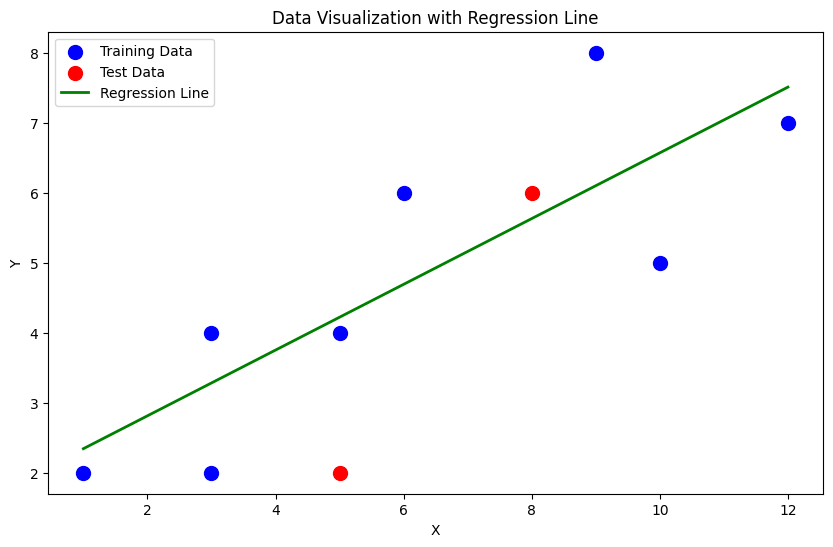

In [81]:
# Tạo biểu đồ
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='blue', label='Training Data', s=100)
plt.scatter(X_test, y_test, color='red', label='Test Data', s=100)


y_values = param[0][0] * X + param[1][0] # bố dg tao cac gia tri x cho đương hồi quy 

plt.plot(X, y_values, color='green', label='Regression Line', linewidth=2)




plt.title('Data Visualization with Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()